# Bitcoin Prediction

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from xgboost import XGBRegressor
py.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
# display plots in the notebook
%matplotlib inline

In [162]:
data = quandl.get('BCHARTS/KRAKENUSD', returns='pandas')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1363 entries, 2014-01-07 to 2017-09-30
Data columns (total 7 columns):
Open                 1363 non-null float64
High                 1363 non-null float64
Low                  1363 non-null float64
Close                1363 non-null float64
Volume (BTC)         1363 non-null float64
Volume (Currency)    1363 non-null float64
Weighted Price       1363 non-null float64
dtypes: float64(7)
memory usage: 85.2 KB


In [163]:
data.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2017-09-26,3922.7,3970.0,3850.0,3885.9,4312.780605,1.689428e+07,3917.258823
2017-09-27,3886.3,4240.0,3870.1,4213.8,6850.548449,2.791226e+07,4074.456105
2017-09-28,4213.9,4285.0,4130.0,4190.0,5769.816879,2.420786e+07,4195.602765
2017-09-29,4195.4,4224.8,4025.0,4157.1,4264.413332,1.762329e+07,4132.641867
2017-09-30,4162.6,4368.0,4151.2,4346.0,3505.911918,1.503763e+07,4289.220367


In [164]:
data['Delta'] = data.Open - data.Close
data.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Delta
Date,,,,,,,,
2017-09-26,3922.7,3970.0,3850.0,3885.9,4312.780605,1.689428e+07,3917.258823,36.8
2017-09-27,3886.3,4240.0,3870.1,4213.8,6850.548449,2.791226e+07,4074.456105,-327.5
2017-09-28,4213.9,4285.0,4130.0,4190.0,5769.816879,2.420786e+07,4195.602765,23.9
2017-09-29,4195.4,4224.8,4025.0,4157.1,4264.413332,1.762329e+07,4132.641867,38.3
2017-09-30,4162.6,4368.0,4151.2,4346.0,3505.911918,1.503763e+07,4289.220367,-183.4


In [165]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

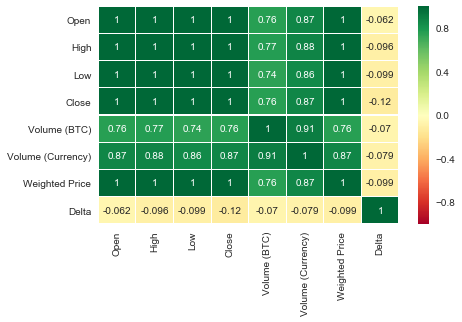

In [177]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)

In [113]:
data['Weighted Price'].resample('D').mean().autocorr(lag=1)

0.99665857584225703

In [114]:
data[['Weighted Price']].resample('D').apply(['median', 'mean']).head()

Weighted Price            
                   median        mean
Date                                 
2014-01-07     841.835522  841.835522
2014-01-08     839.156269  839.156269
2014-01-09     831.572913  831.572913
2014-01-10     844.938794  844.938794
2014-01-11     890.671709  890.671709

In [115]:
data[['Weighted Price']].resample('D').mean().rolling(window=3, center=True).mean().head()

,Weighted Price
Date,
2014-01-07,NaN
2014-01-08,837.521568
2014-01-09,838.555992
2014-01-10,855.727805
2014-01-11,865.355116


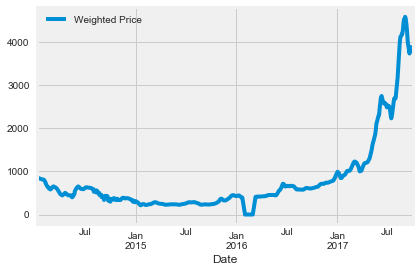

In [116]:
data[['Weighted Price']].resample('D').mean().rolling(window=10, center=True).mean().plot()

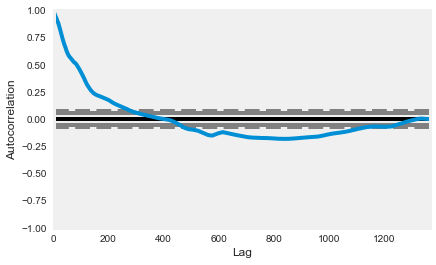

In [117]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Weighted Price'])

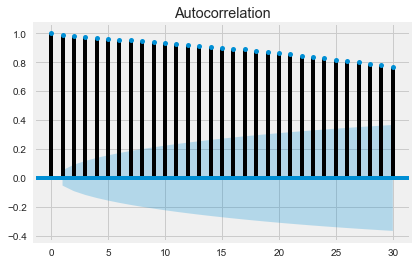

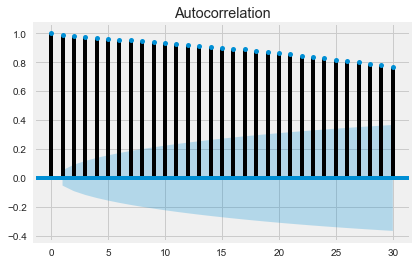

In [118]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Weighted Price'], lags=30)

In [119]:
n = len(data['Weighted Price'])

train = data['Weighted Price'][:int(.75*n)]
test = data['Weighted Price'][int(.75*n):]

In [120]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

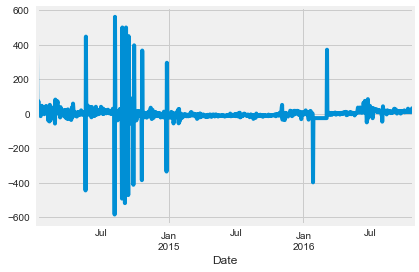

In [121]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

model.resid.plot()

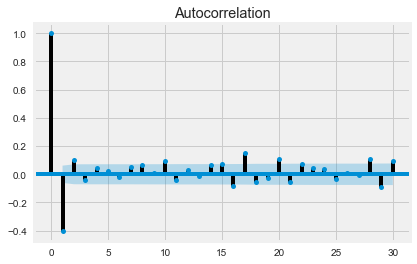

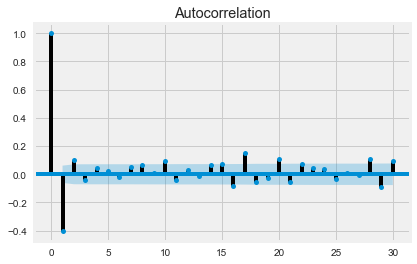

In [122]:
plot_acf(model.resid, lags=30)

In [123]:
# XG Boost Regressor
y = data['Weighted Price']
X = data.drop('Weighted Price', axis=1)

In [124]:
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

20.0


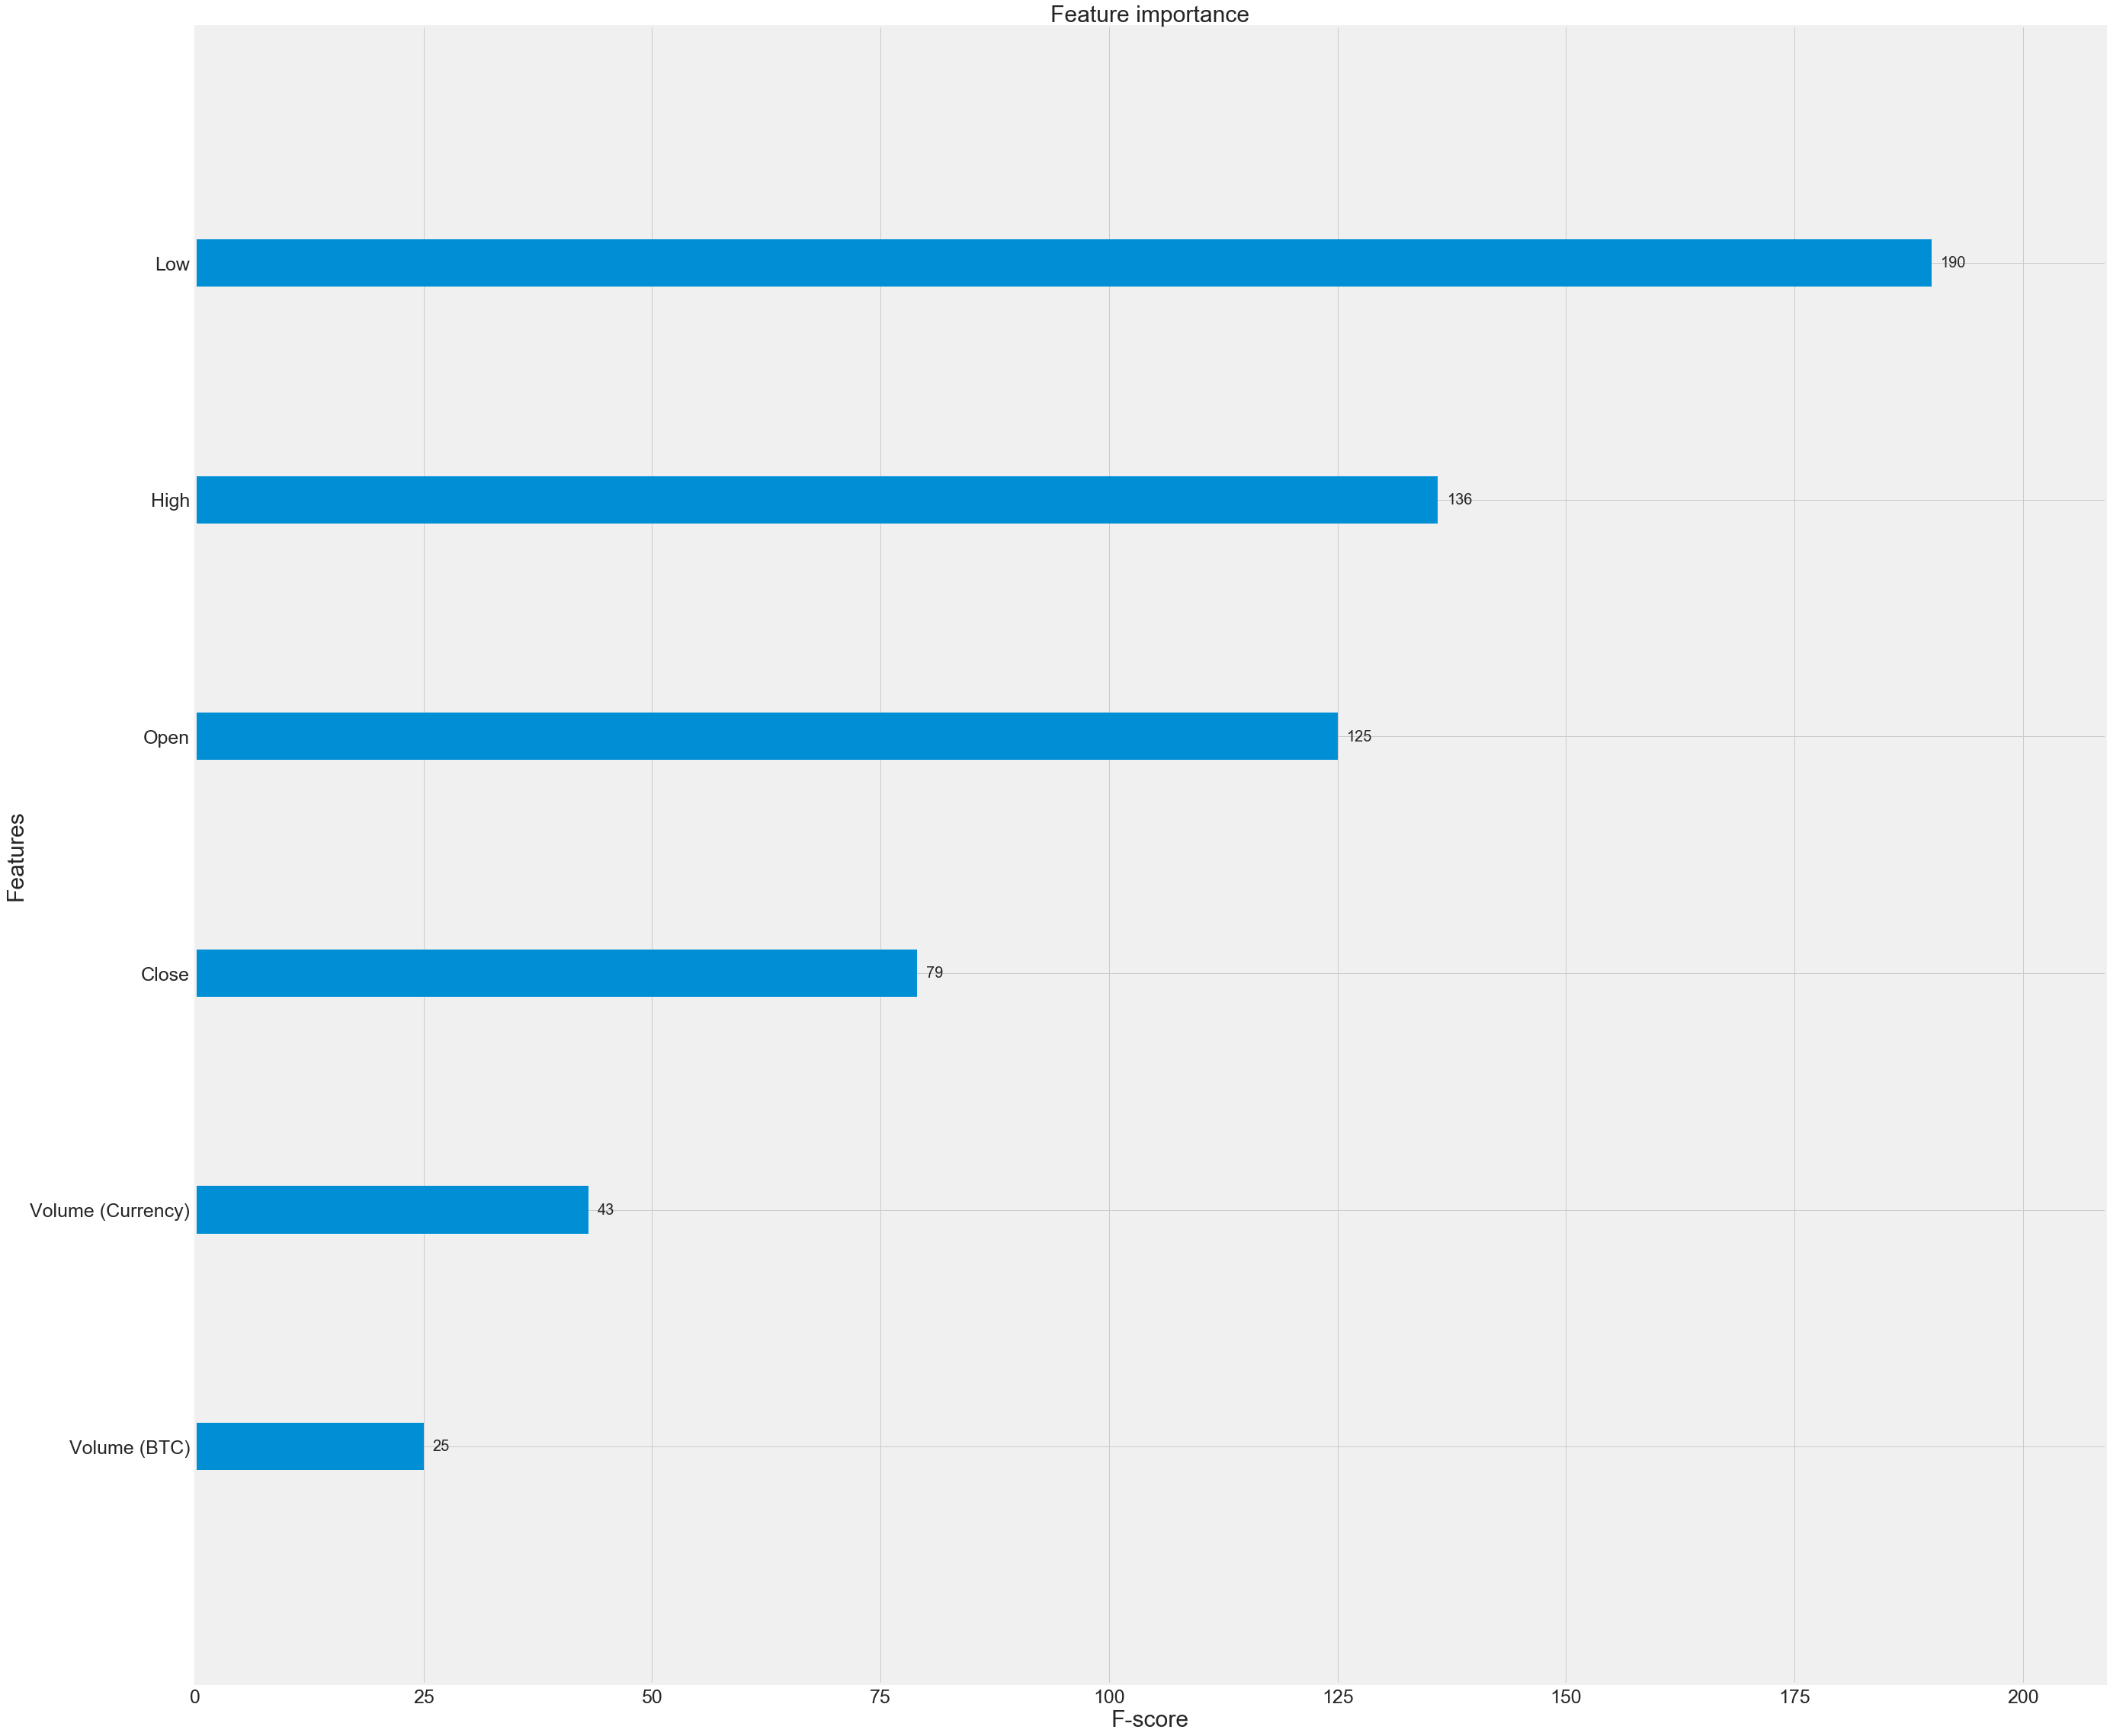

In [134]:
from xgboost import plot_importance
plot_importance(model)
plt.rcParams["font.size"] = 20
print(plt.rcParams["font.size"])
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('F-score', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.title('Feature importance', fontsize=30)
plt.show()

plt.rcParams["figure.figsize"] = [40, 40]
